In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df_inflation = pd.read_csv('C:/Users/USER/Desktop/SET2/inflation_data.csv', parse_dates=[0])
df_inflation.tail()

,date,inflation
103,2022-08-01,7.0
104,2022-09-01,7.4
105,2022-10-01,6.8
106,2022-11-01,5.9
107,2022-12-01,5.7


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

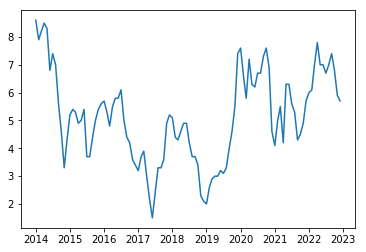

In [3]:
# plt.figure(figsize=(10, 4))
plt.plot(df_inflation['date'], df_inflation['inflation'])

In [4]:
df_inflation2 = df_inflation[(df_inflation['date'] >= '01-01-2020') & (df_inflation['date'] <= '31-12-2020')]

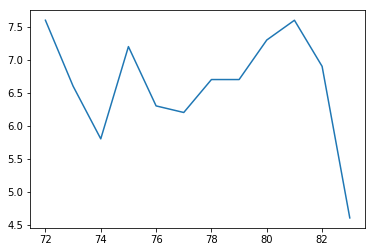

In [5]:
plt.plot(df_inflation2['inflation'])

## Trend line

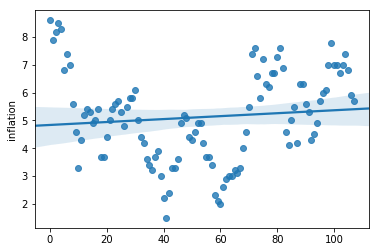

In [6]:
sns.regplot(x = df_inflation.index.values, y = df_inflation['inflation'])
# There is a negative trend

## Lag plot

In [7]:
from pandas.plotting import lag_plot

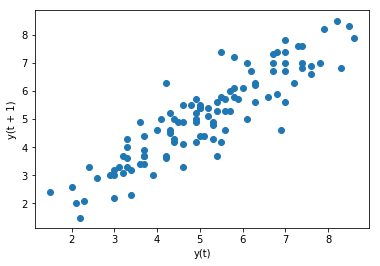

In [8]:
lag_plot(df_inflation['inflation'])

## Autocorrelation plot

In [9]:
from pandas.plotting import autocorrelation_plot

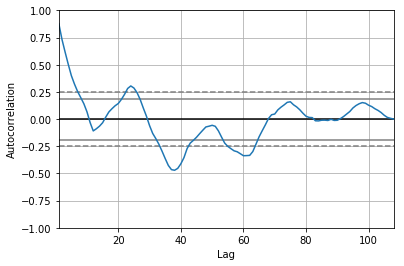

In [10]:
autocorrelation_plot(df_inflation['inflation'])

## Decomposition

In [11]:
df_inflation.head(5)

,date,inflation
0,2014-01-01,8.6
1,2014-02-01,7.9
2,2014-03-01,8.2
3,2014-04-01,8.5
4,2014-05-01,8.3


In [12]:
df_inflation3 = df_inflation
df_inflation3.index = df_inflation3['date']
df_inflation3.head(5)

,date,inflation
date,,
2014-01-01,2014-01-01,8.6
2014-02-01,2014-02-01,7.9
2014-03-01,2014-03-01,8.2
2014-04-01,2014-04-01,8.5
2014-05-01,2014-05-01,8.3


In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
result = adfuller(df_inflation3['inflation'])
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -1.8381469712118446
p-value:  0.3616939034988115


In [15]:
# y(t) = Level + Trend + Seasonality + Noise

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(df_inflation3['inflation'], model = 'additive')

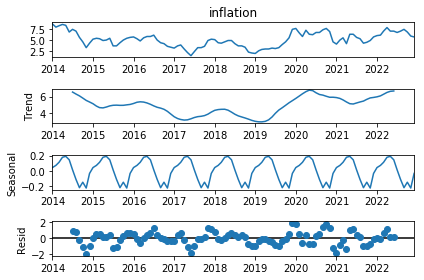

In [18]:
result.plot();

In [19]:
result2 = seasonal_decompose(df_inflation3['inflation'], model = 'multiplicative')

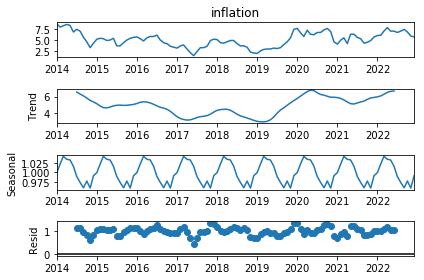

In [20]:
result2.plot();

In [21]:
# Removing trend and seasonality using differencing

In [22]:
df_inflation3.head()

,date,inflation
date,,
2014-01-01,2014-01-01,8.6
2014-02-01,2014-02-01,7.9
2014-03-01,2014-03-01,8.2
2014-04-01,2014-04-01,8.5
2014-05-01,2014-05-01,8.3


In [23]:
df_inflation3['lag_1'] = df_inflation3['inflation'].shift(1)
df_inflation3['diff_1'] = df_inflation3['inflation'].diff(periods = 1)
df_inflation3.head()

,date,inflation,lag_1,diff_1
date,,,,
2014-01-01,2014-01-01,8.6,NaN,NaN
2014-02-01,2014-02-01,7.9,8.6,-0.7
2014-03-01,2014-03-01,8.2,7.9,0.3
2014-04-01,2014-04-01,8.5,8.2,0.3
2014-05-01,2014-05-01,8.3,8.5,-0.2


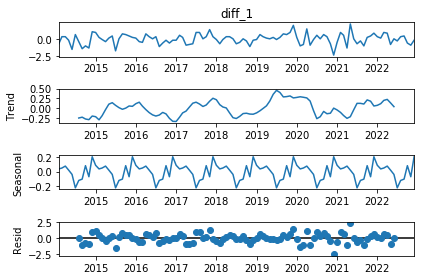

In [24]:
result3 = seasonal_decompose(df_inflation3.iloc[1:,3], model = 'additive')
result3.plot();

In [25]:
result = adfuller(df_inflation3['diff_1'].dropna())
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -4.484618153092416
p-value:  0.00020961468868987005


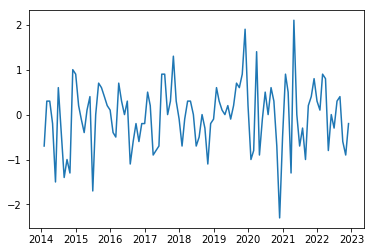

In [26]:
plt.plot(df_inflation3['diff_1'])

## Create train and test datasets

In [27]:
train_size = int(df_inflation3.shape[0]*0.8)
train_size

86

## Naive persistant model

In [28]:
train = df_inflation3[1:train_size-7]
test = df_inflation3[train_size-7:]

In [29]:
train.head()

,date,inflation,lag_1,diff_1
date,,,,
2014-02-01,2014-02-01,7.9,8.6,-0.7
2014-03-01,2014-03-01,8.2,7.9,0.3
2014-04-01,2014-04-01,8.5,8.2,0.3
2014-05-01,2014-05-01,8.3,8.5,-0.2
2014-06-01,2014-06-01,6.8,8.3,-1.5


In [30]:
train_x, train_y = train['lag_1'], train['inflation']
test_x, test_y = test['lag_1'], test['inflation']

In [31]:
# Walk forward validation
predictions = test_x.copy()

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
# mean squared error
mse = mean_squared_error(test_y, predictions)
mse

0.6827586206896551

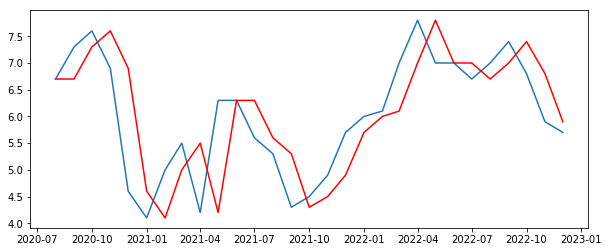

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(test_y)
plt.plot(predictions, color='red')

## ARIMA

In [40]:
# D = 1 value will be 1 as diff_1 is used (there is not quadratic trend)
# p = 8 As the autocorrelation plot shows that the line is crossing into confidence interval region after 8
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

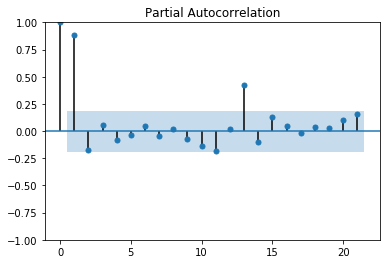

In [43]:
plot_pacf(df_inflation3['inflation']);

In [37]:
# since the graph is crossing between 1 and 2, so q = 1

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
model = ARIMA(df_inflation3['inflation'], order = (1, 1, 0))

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
model_fit = model.fit()

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  108
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -116.142
Date:                Mon, 22 May 2023   AIC                            236.284
Time:                        21:17:34   BIC                            241.630
Sample:                    01-01-2014   HQIC                           238.451
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1528      0.092      1.669      0.095      -0.027       0.332
sigma2         0.5131      0.059      8.675      0.000       0.397       0.629
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.76   Prob(JB):                         0.15
Heteroskedasticity (H):               1.49   Skew:                            -0.03
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

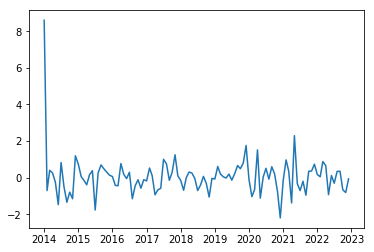

In [42]:
residuals_arima = model_fit.resid
plt.plot(residuals_arima)

In [43]:
residuals_arima.describe()

count    108.000000
mean       0.056599
std        1.096003
min       -2.193016
25%       -0.433628
50%        0.045850
75%        0.364195
max        8.600000
dtype: float64

## Validation for ARIMA

In [44]:
# df_inflation.drop(['lag_1', 'diff_1'], axis = 1, inplace = True)
train = df_inflation[1:train_size-7]
test = df_inflation[train_size-7:]
train.head()

,date,inflation,lag_1,diff_1
date,,,,
2014-02-01,2014-02-01,7.9,8.6,-0.7
2014-03-01,2014-03-01,8.2,7.9,0.3
2014-04-01,2014-04-01,8.5,8.2,0.3
2014-05-01,2014-05-01,8.3,8.5,-0.2
2014-06-01,2014-06-01,6.8,8.3,-1.5


In [45]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start = start, end = end, typ = 'levels')
pred.head()

2020-07-01    6.184717
2020-08-01    6.776417
2020-09-01    6.700000
2020-10-01    7.391701
2020-11-01    7.645850
Freq: MS, Name: predicted_mean, dtype: float64

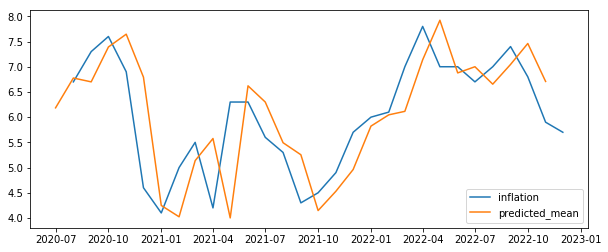

In [46]:
plt.figure(figsize=(10, 4))
plt.plot(test['inflation'])
plt.plot(pred)
plt.legend()

## MSE for ARIMA Model

In [47]:
from sklearn.metrics import mean_squared_error

In [51]:
mes = mean_squared_error(pred, test['inflation'])
mse

0.6827586206896551

In [52]:
test['inflation'].mean(), np.sqrt(test['inflation'].var())

(6.041379310344827, 1.090058072299463)

## LSTM - RNN

In [49]:
# Refer google colab